# Custom tree visualization using the ETE API

## Relevant documentation

- [Programmatic tree visualization](http://etetoolkit.org/docs/latest/tutorial/tutorial_drawing.html)

## Crash course on how the ETE tree drawing engine works

ETE tree images can be modified using: 

- **TreeStyle**: defines general aspect of the tree. For instance, the scale used, circular or rectangular, etc.
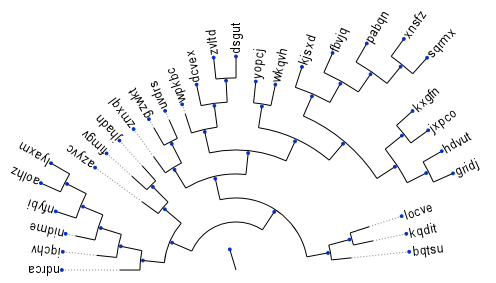

- **NodeStyle**: each node has a "img_style" attribute that can be used to modify the general aspect of the node
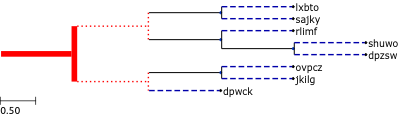

- **Layout function**: a customg Python that can be used to adjust, on run time, the aspect of each node
 - Node **Faces**: are small graphical elements that can be attached to each node
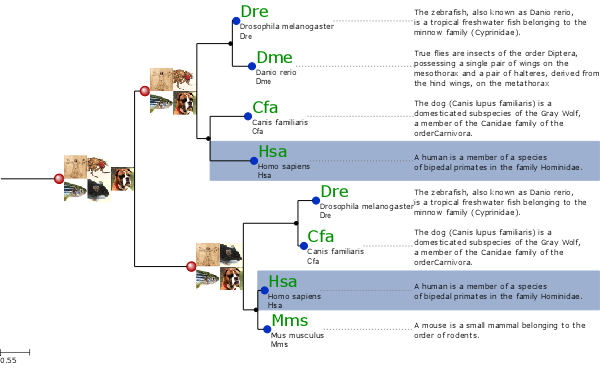 
        

### Layout design is based on a virtual grid around each node

The most important concept to master Tree Visualization is undestanding how Faces (graphical elements are distributed)

- each node can add any number of Faces at each of the its relative positions: 

  `branch-top, branch-right, branch-bottom, float and aligned`

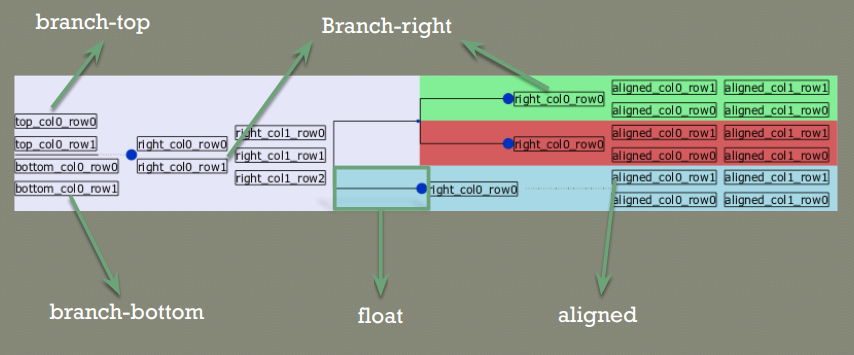

## TASK: Load one of your trees, annotate it and create custom images

Tip: 
- use NCBI annotations
- use Linked aligments
- use evol event annotations

In [134]:
# Load Trees

import pickle
def extract_spcode(nodename):
    return nodename.split('.')[0]

all_trees = pickle.load(open('data/alltrees.pkl', 'rb'))
print("Trees loaded:", len(all_trees))

Trees loaded: 2601


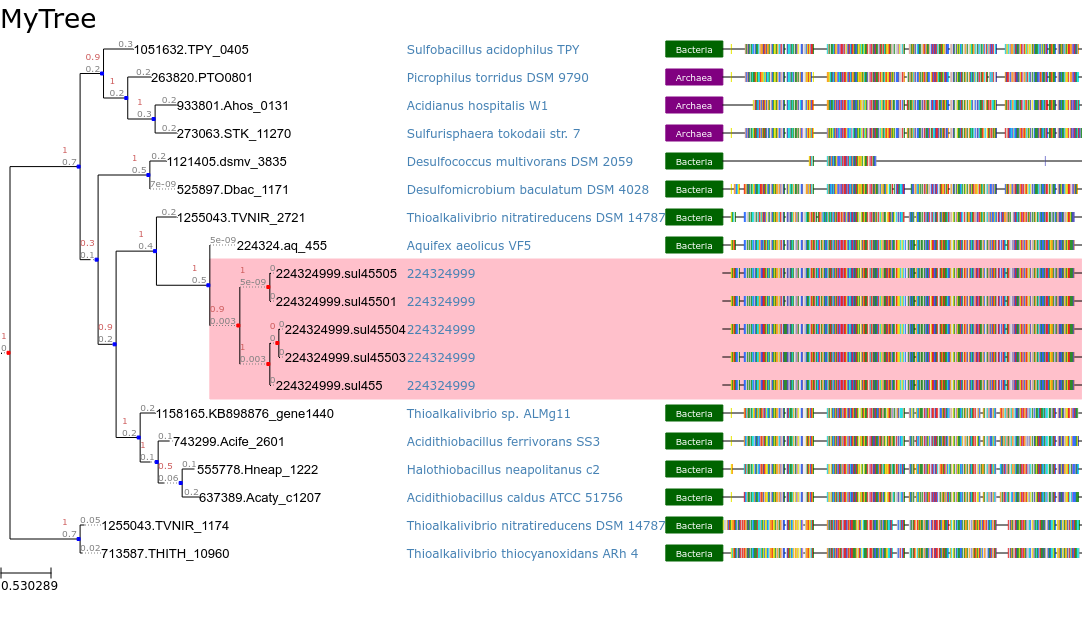

In [143]:
from ete3 import TreeStyle, TextFace, SeqMotifFace, add_face_to_node

def mylayout(node):
    
    # Default node style
    node.img_style["shape"] = 'square'
    node.img_style["fgcolor"] = 'black'
    
    
    if not node.is_leaf():         
        # color nodes by evoltype
        if node.evoltype == 'D':        
            node.img_style["fgcolor"] = 'red' 
        elif node.evoltype == "S":
            node.img_style["fgcolor"] = 'blue' 
            
        # Add support values to internal branches
        supFace = TextFace("%0.1g" %node.support, fsize=7, fgcolor="IndianRed")
        add_face_to_node(supFace, node, column=0, position="branch-top")                                   
    else: 
        node.img_style["fgcolor"] = 'black'
        node.img_style["size"] = 0
        
        # add species name
        spFace = TextFace(node.sci_name, fsize=9, fgcolor="steelBlue")
        add_face_to_node(spFace, node, column=0, position="aligned")

        # add taxonomic info
        if "Archaea" in node.named_lineage:
            taxoFace = TextFace("Archaea", fsize=7, fgcolor="white")
            add_face_to_node(taxoFace, node, column=1, position="aligned")
            taxoFace.background.color = 'purple'
            taxoFace.margin_left = 10
            taxoFace.margin_right = 10
        elif "Bacteria" in node.named_lineage:
            taxoFace = TextFace("Bacteria", fsize=7, fgcolor="white")
            add_face_to_node(taxoFace, node, column=1, position="aligned")            
            taxoFace.background.color = 'darkGreen'
            taxoFace.margin_left = 10
            taxoFace.margin_right = 10
        else: 
            taxoFace = TextFace("", fsize=7, fgcolor="white")
            add_face_to_node(taxoFace, node, column=1, position="aligned")            
               
        # add aligned sequence
        seqFace = SeqMotifFace(node.sequence, seq_format='compactseq')
        add_face_to_node(seqFace, node, column=2, position="aligned")
        
        
        
    # Add distances to the tree branches
    distFace = TextFace("%0.1g" %node.dist, fsize=7, fgcolor="grey")
    add_face_to_node(distFace, node, column=0, position="branch-top")


def render_tree(t, tname):            
    # Root, standardize and annotate as you have learned!
    t.standardize()
    out = t.get_midpoint_outgroup()
    t.set_outgroup(out)
    t.get_descendant_evol_events()
    t.annotate_ncbi_taxa()
    t.link_to_alignment('data/phylo/%s/mafft_default-none-none-fasttree_default/%s.faa.final_tree.used_alg.fa' %(tname, tname))

    ts = TreeStyle()
    ts.title.add_face(TextFace('MyTree', fsize=20), 0)
    ts.layout_fn = [mylayout]
    display(t.render("%%inline", tree_style=ts))
    return t


# Load the plain target tree    
t = all_trees['224324999.sul455']
# You modify node aspect statically (outside the layout function)
expansion = t.get_common_ancestor('224324999.sul455', '224324999.sul45505')
expansion.img_style['bgcolor'] = 'pink'

annotated_tree = render_tree(t, '224324999.sul455')

You can also render partial images for specific nodes

In [ ]:
# render specific nodes
display(expansion.render("%%inline", tree_style=ts))

Or render similar images for any tree in your collection!

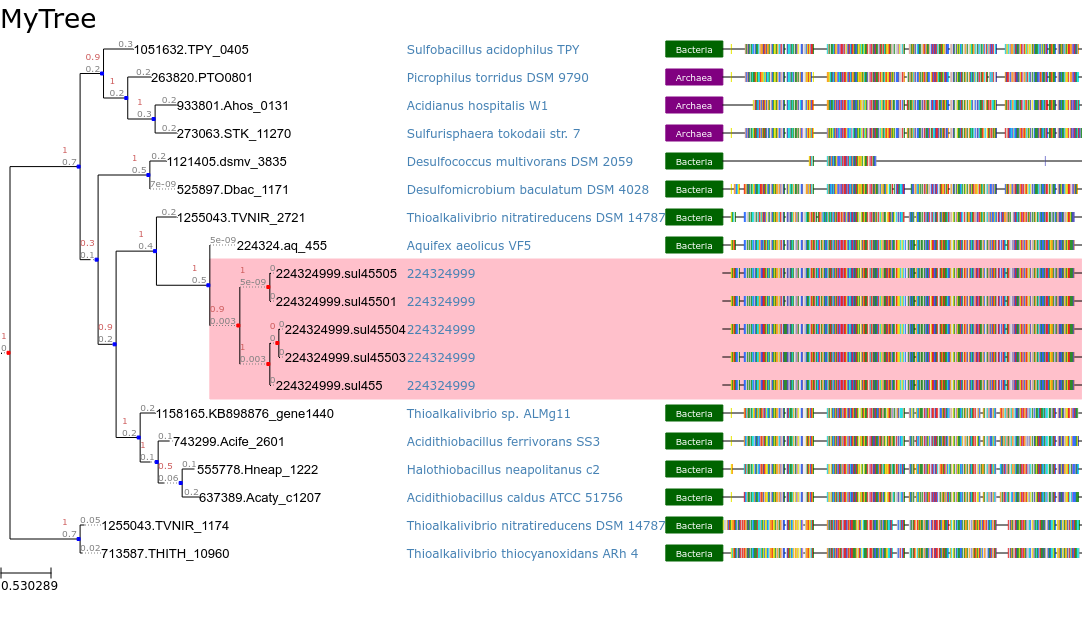

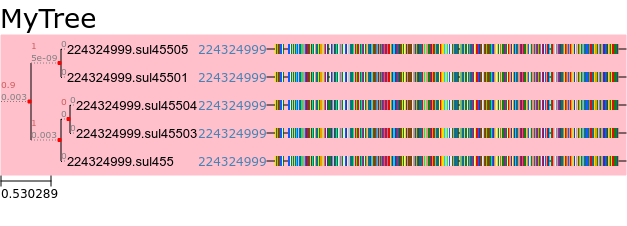

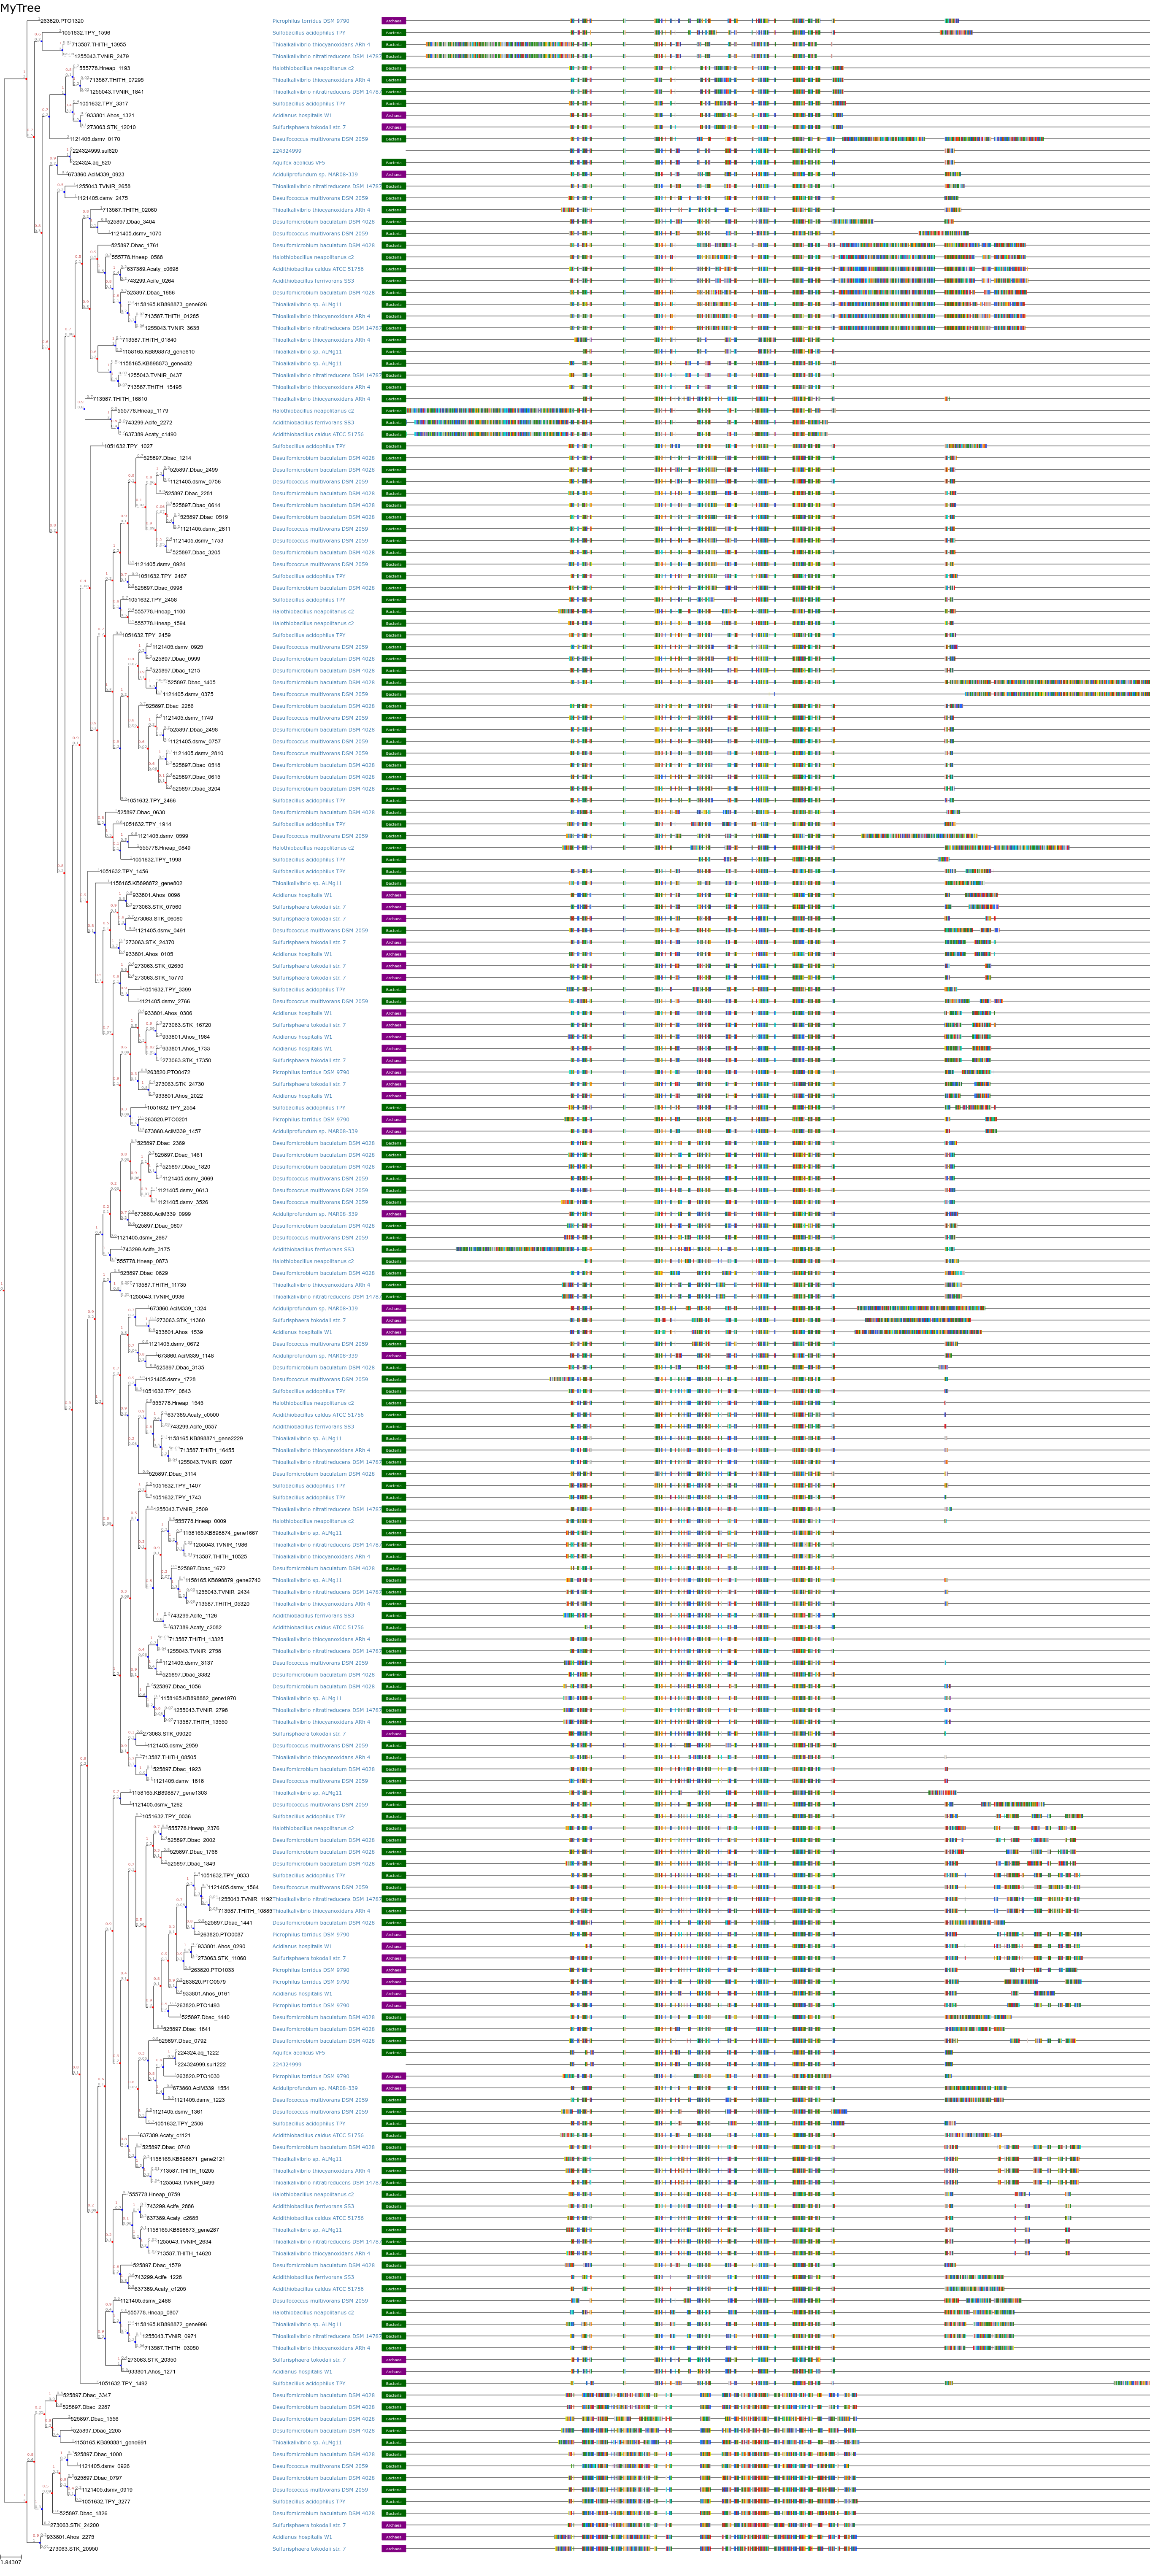

In [141]:
# Or other trees
t = all_trees['525897.Dbac_1405']
annotated_tree = render_tree(t, '525897.Dbac_1405')